<h1>Credit card fraud detection</h1>

<h2>Problem Datasets Discription</h2>
<p></p>
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Loading the dataset

In [48]:
data=pd.read_csv('Sample.csv')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85442 entries, 0 to 85441
Data columns (total 32 columns):
Unnamed: 0    85442 non-null int64
Time          85442 non-null float64
V1            85442 non-null float64
V2            85442 non-null float64
V3            85442 non-null float64
V4            85442 non-null float64
V5            85442 non-null float64
V6            85442 non-null float64
V7            85442 non-null float64
V8            85442 non-null float64
V9            85442 non-null float64
V10           85442 non-null float64
V11           85442 non-null float64
V12           85442 non-null float64
V13           85442 non-null float64
V14           85442 non-null float64
V15           85442 non-null float64
V16           85442 non-null float64
V17           85442 non-null float64
V18           85442 non-null float64
V19           85442 non-null float64
V20           85442 non-null float64
V21           85442 non-null float64
V22           85442 non-null float64
V23  

In [50]:
data.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,182545,125447.0,1.816429,0.146354,0.046576,3.598831,-0.119489,0.764143,-0.673691,0.375930,...,0.235474,0.539597,0.240714,0.691290,-0.349606,-0.055401,-0.011830,-0.033766,18.92,0
1,264950,161666.0,-1.132632,-0.217753,-1.018984,-0.725154,1.624606,-1.123202,0.151016,0.322056,...,0.439623,0.855120,-0.058180,0.115257,-0.786822,0.591033,0.308595,0.055496,24.95,0
2,278614,168323.0,1.754189,0.230348,0.019154,3.927093,-0.087202,0.227146,-0.115704,0.053371,...,-0.374842,-1.136878,0.441901,-0.183241,-0.580846,-0.508929,-0.005608,-0.019285,64.40,0
3,10160,15578.0,1.028419,0.252588,1.744422,2.801771,-0.613426,0.860407,-0.849896,0.375564,...,-0.148324,-0.044123,0.103698,0.142224,0.132222,-0.080803,0.026917,0.016913,0.00,0
4,64,42.0,-0.522666,1.009923,0.276470,1.475289,-0.707013,0.355243,1.559849,-0.399579,...,0.172401,1.011543,0.069666,0.157820,-1.109224,-0.302369,0.318170,0.316910,243.66,0


<p></p>

Checking the the target class


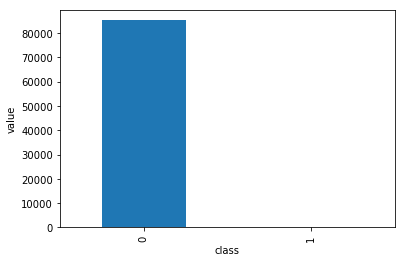

In [51]:
count=data['Class'].value_counts()
count.plot(kind='bar')
plt.xlabel('class')
plt.ylabel('value')

<h3>Clearly the data is totally unbalanced!!</h3>

<p>This is a clear example where using a typical accuracy score to evaluate our classification algorithm. For example, if we just used a majority class to assign values to all records, we will still be having a high accuracy, BUT WE WOULD BE CLASSIFYING ALL "1" INCORRECTLY!!</p>

There are several ways to approach this classification problem taking into consideration this unbalance.
<ul>
<li>Collect more data? Nice strategy but not applicable in this case.</li>
<li>Changing the performance metric:
    <ul><li>Use the confusio nmatrix to calculate Precision, Recall</li>
    <li>F1score (weighted average of precision recall)</li>
    <li>Use Kappa - which is a classification accuracy normalized by the imbalance of the classes         in the data</li>
    <li>ROC curves - calculates sensitivity/specificity ratio.</li></ul></li>
<li>Resampling the dataset:
   <ul><li>Essentially this is a method that will process the data to have an approximate 50-50               ratio.</li>
    <li>One way to achieve this is by OVER-sampling, which is adding copies of the under-                 represented class (better when you have little data)</li>
    <li>Another is UNDER-sampling, which deletes instances from the over-represented class (better         when he have lot's of data)</li></ul></li>
</ul>

Normalising the amount column

In [52]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
data['norm_amount']=ss.fit_transform(data['Amount'].values.reshape(-1,1))
data=data.drop(['Amount','Time'],axis=1)
data.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,norm_amount
0,182545,1.816429,0.146354,0.046576,3.598831,-0.119489,0.764143,-0.673691,0.375930,-0.534457,...,0.235474,0.539597,0.240714,0.691290,-0.349606,-0.055401,-0.011830,-0.033766,0,-0.294421
1,264950,-1.132632,-0.217753,-1.018984,-0.725154,1.624606,-1.123202,0.151016,0.322056,-0.238261,...,0.439623,0.855120,-0.058180,0.115257,-0.786822,0.591033,0.308595,0.055496,0,-0.269052
2,278614,1.754189,0.230348,0.019154,3.927093,-0.087202,0.227146,-0.115704,0.053371,-0.475027,...,-0.374842,-1.136878,0.441901,-0.183241,-0.580846,-0.508929,-0.005608,-0.019285,0,-0.103078
3,10160,1.028419,0.252588,1.744422,2.801771,-0.613426,0.860407,-0.849896,0.375564,1.171960,...,-0.148324,-0.044123,0.103698,0.142224,0.132222,-0.080803,0.026917,0.016913,0,-0.374021
4,64,-0.522666,1.009923,0.276470,1.475289,-0.707013,0.355243,1.559849,-0.399579,-0.479813,...,0.172401,1.011543,0.069666,0.157820,-1.109224,-0.302369,0.318170,0.316910,0,0.651104


In [55]:
data=data.iloc[:,1:]

In [57]:
x=data.drop('Class',axis=1).values
y=data.loc[:,'Class'].values

UNDER-sampling

In [58]:
number_frauds=len(data[data.Class==1])
fraud_indices=np.array(data[data.Class==1].index)

normal_indices=data[data.Class==0].index

rand_normal_indices=np.random.choice(normal_indices,number_frauds,replace=False)

under_sample_indices=np.concatenate([fraud_indices,rand_normal_indices])

under_sample_data=data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class'].values
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class'].values.ravel()



In [59]:
print("Percentage of normal transactions:", len(under_sample_data[under_sample_data.Class==0])/
     len(under_sample_data))
print("Percentage of fraud transactions:", len(under_sample_data[under_sample_data.Class==1])/
     len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions: 0.5
Percentage of fraud transactions: 0.5
Total number of transactions in resampled data:  320


Splitting data into train and test set

In [60]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.30, random_state=0)

print("Number transactions train dataset: ", len(x_train))
print("Number transactions test dataset: ", len(x_test))
print("Total number of transactions: ", len(x_train)+len(x_test))

x_train_undersample,x_test_undersample,y_train_undersample,y_test_undersample=train_test_split(
X_undersample, y_undersample, test_size=0.30, random_state=0)

print("")
print("Number transactions train dataset: ", len(x_train_undersample))
print("Number transactions test dataset: ", len(x_test_undersample))
print("Total number of transactions: ", len(x_train_undersample)+len(x_test_undersample))

Number transactions train dataset:  59809
Number transactions test dataset:  25633
Total number of transactions:  85442

Number transactions train dataset:  224
Number transactions test dataset:  96
Total number of transactions:  320


<h2>Logistic regression classifier - Undersampled data</h2>

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import (make_scorer, accuracy_score, confusion_matrix, precision_recall_curve,
                             auc,roc_curve, roc_auc_score ,recall_score, classification_report)

In [62]:
fold=KFold(n_splits=5,random_state=0)
lr=LogisticRegression(random_state=0)
score=make_scorer(recall_score)
c=[0.01, 0.1,1,10,10]
param={'C':c}
grd=GridSearchCV(lr,param,scoring=score,cv=fold)
grd.fit(x_train_undersample,y_train_undersample)
print(grd.best_score_, grd.best_params_, grd.scorer_)

0.894215593434 {'C': 0.01} make_scorer(recall_score)


In [63]:
#the best undersample model

lr=LogisticRegression(C=0.01,random_state=0)
lr.fit(x_train_undersample,y_train_undersample)
y_pred_undersample=lr.predict(x_test_undersample)
y_pred=lr.predict(x_test)

In [64]:
import seaborn as sns
def metric(y_t,y_p):
    cm=confusion_matrix(y_t,y_p)
    ac=accuracy_score(y_t,y_p)
    print('accuracy',ac)
    rs=recall_score(y_t,y_p)
    print("recall_score",rs)
    df_cm=pd.DataFrame(cm,index=[i for i in['normal','fraud']],
                       columns=[k for k in ['normal','fraud']])
    sns.heatmap(df_cm,annot=True,cmap='Blues',fmt='g')
    plt.title('Confusion matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy 0.979166666667
recall_score 0.981132075472


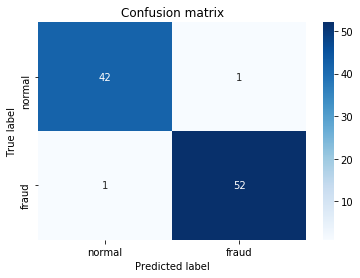

In [65]:
metric(y_test_undersample,y_pred_undersample)

accuracy 0.88659150314
recall_score 0.931034482759


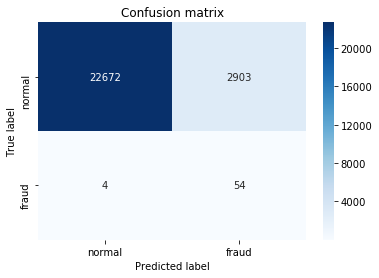

In [66]:
metric(y_test,y_pred)

Still a very decent recall accuracy when applying it to a much larger and skewed dataset!

<h3>Plotting ROC curve and Precision-Recall curve.</h3>
<ul>
<li>I find precision-recall curve much more convenient in this case as our problems relies on the "positive" class being more interesting than the negative class, but as we have calculated the recall precision, I am not going to plot the precision recall curves yet.</li>

<li>AUC and ROC curve are also interesting to check if the model is also predicting as a whole correctly and not making many errors</li></ul>

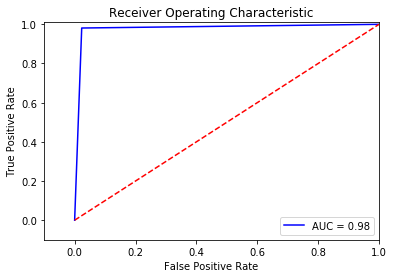

In [67]:
# ROC CURVE

fpr, tpr,threshols = roc_curve(y_test_undersample,y_pred_undersample)
roc_auc= auc(fpr,tpr)

# plot ruc
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h2>Logistic regression classifier - Skewed data</h2>

In [68]:
fold2=KFold(n_splits=5,random_state=0)
lr2=LogisticRegression(random_state=0)
score2=make_scorer(recall_score)
c2=[0.01, 0.1,1,10,10]
param2={'C':c2}
grd2=GridSearchCV(lr2,param2,scoring=score2,cv=fold2)
grd2.fit(x_train,y_train)
print(grd2.best_score_, grd2.best_params_, grd2.scorer_)

0.581495500946 {'C': 1} make_scorer(recall_score)


In [69]:
lr2=LogisticRegression(C=0.01,random_state=0)
lr2.fit(x_train,y_train)
y_pred2=lr2.predict(x_test)

accuracy 0.998868645886
recall_score 0.620689655172


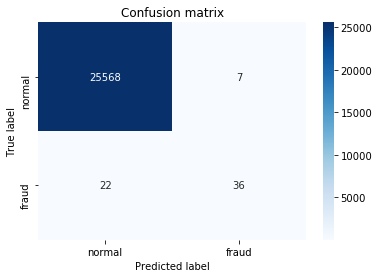

In [70]:
metric(y_test,y_pred2)

<h2>Changing classification threshold</h2>

We have seen that by undersampling the data, our algorithm does a much better job at detecting fraud. I wanted also to show how can we tweak our final classification by changing the threshold.

accuracy 0.552083333333
recall_score 1.0
accuracy 0.552083333333
recall_score 1.0
accuracy 0.5625
recall_score 1.0
accuracy 0.760416666667
recall_score 1.0
accuracy 0.979166666667
recall_score 0.981132075472
accuracy 0.947916666667
recall_score 0.905660377358
accuracy 0.9375
recall_score 0.88679245283
accuracy 0.927083333333
recall_score 0.867924528302
accuracy 0.885416666667
recall_score 0.792452830189


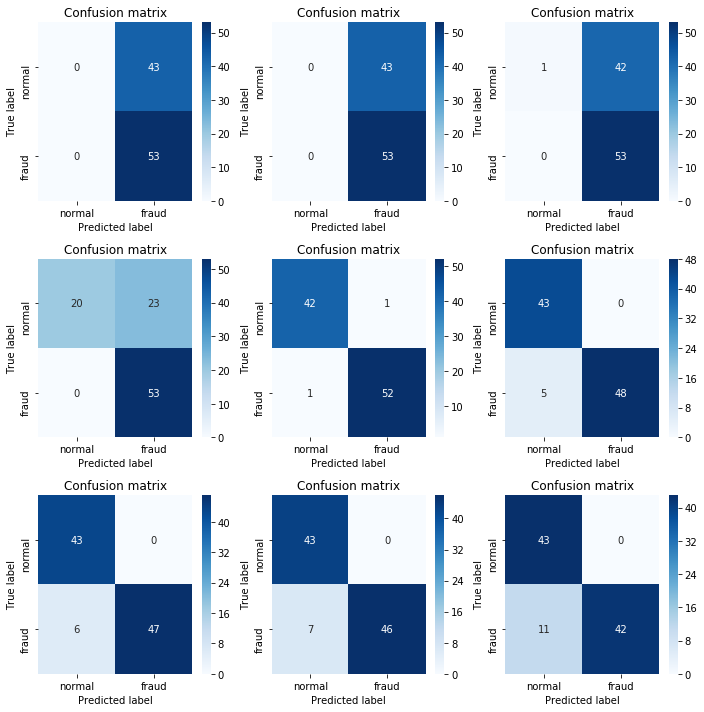

In [71]:
# using logistic classifier for undersampled data

y_pred_undersample_proba=lr.predict_proba(x_test_undersample)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
j=1
plt.figure(figsize=(10,10))
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    plt.subplot(3,3,j)
    plt.tight_layout()
    j += 1
    metric(y_test_undersample,y_test_predictions_high_recall)
    

The pattern is very clear: the more you lower the required probability to put a certain in the class "1" category, more records will be put in that bucket

<h3>Precision-Recall curve and area under this curve</h3>

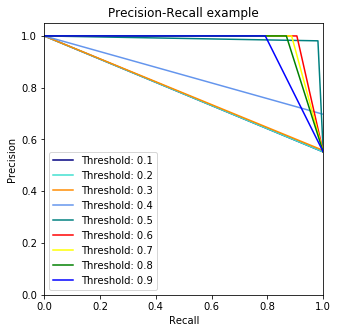

In [72]:
from itertools import cycle

colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red',
                'yellow', 'green', 'blue','black'])

plt.figure(figsize=(5,5))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_undersample_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_test_undersample,
                                                           y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend(loc="lower left")